### 4741 Drinks!

Analyzing Cocktails! I will just leave the code here. It is not particularily pretty and comes actually from another project, so a lot of the variables have weird names... Loading packages:

In [2]:

import metaknowledge as mk
import pandas as pd
import numpy as np
from random import randint
import datetime

#For plotting in Python
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

#For Tables:
from IPython.display import display
pd.set_option('display.max_columns', 500)

#For plotting in R (ggplot2)
%load_ext rpy2.ipython

#### Loading the data:


In [5]:


df = pd.read_csv('nodes2.csv', delimiter=';')
df.columns = ['name','ingredients','id']

display(df)

,name,ingredients,id
0,Absinthe Cocktail,"pastis, water, anisette, orange bitters",1.0
1,Absinthe Cocktail Variation,"pastis, Angostura bitters, anisette, orgeat",2.0
2,Absinthe American,"water, pastis",3.0
3,Absinthe And Egg,"pastis, egg white, gin",4.0
4,Absinthe French,"pastis, sugar",5.0
5,Absinthe Italiano,"pastis, anisette, water, maraschino liqueur",6.0
6,Absinthe Special Cocktail,"pastis, water, sugar, orange bitters",7.0
7,Absinthe Special,"pastis, gin, anisette, orange bitters",8.0
8,Acacia Cocktail,"gin, Benedictine, kirsch",9.0
9,Ace Cocktail,"egg white, gin, cream, grenadine",10.0


#### Vectorizing:

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re

d =  df['ingredients'].tolist()
k = []
for x in d:
   k.append(x.split(','))

authorslist = [';'.join(filter(None,x)) for x in list(k)] 
#print(authorslist)


vec = CountVectorizer(token_pattern=r'(?<=[^|;])[\s\w]+(?=[$|;])')
Xrc = vec.fit_transform(authorslist)

display(pd.DataFrame(Xrc.toarray(), columns=vec.get_feature_names()).transpose()) #To look into the vectors. Beware, can take a bit of RAM

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,4491,4492,4493,4494,4495,4496,4497,4498,4499,4500,4501,4502,4503,4504,4505,4506,4507,4508,4509,4510,4511,4512,4513,4514,4515,4516,4517,4518,4519,4520,4521,4522,4523,4524,4525,4526,4527,4528,4529,4530,4531,4532,4533,4534,4535,4536,4537,4538,4539,4540,4541,4542,4543,4544,4545,4546,4547,4548,4549,4550,4551,4552,4553,4554,4555,4556,4557,4558,4559,4560,4561,4562,4563,4564,4565,4566,4567,4568,4569,4570,4571,4572,4573,4574,4575,4576,4577,4578,4579,4580,4581,4582,4583,4584,4585,4586,4587,4588,4589,4590,4591,4592,4593,4594,4595,4596,4597,4598,4599,4600,4601,4602,4603,4604,4605,4606,4607,4608,4609,4610,4611,4612,4613,4614,4615,4616,4617,4618,4619,4620,4621,4622,4623,4624,4625,4626,4627,4628,4629,4630,4631,4632,4633,4634,4635,4636,4637,4638,4639,4640,4641,4642,4643,4644,4645,4646,4647,4648,4649,4650,4651,4652,4653,4654,4655,4656,4657,4658,4659,4660,4661,4662,4663,4664,4665,4666,4667,4668,4669,4670,4671,4672,4673,4674,4675,4676,4677,4678,4679,4680,4681,4682,4683,4684,4685,4686,4687,4688,4689,4690,4691,4692,4693,4694,4695,4696,4697,4698,4699,4700,4701,4702,4703,4704,4705,4706,4707,4708,4709,4710,4711,4712,4713,4714,4715,4716,4717,4718,4719,4720,4721,4722,4723,4724,4725,4726,4727,4728,4729,4730,4731,4732,4733,4734,4735,4736,4737,4738,4739,4740
james rum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
or cream,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#### Dimensionality-reduction using SVD:

In [7]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=80, n_iter=7, random_state=42)

XSVD = SVD.fit_transform(Xrc)
print(SVD.explained_variance_ratio_.sum())
dSVD = pd.DataFrame(XSVD)

sSVD = dSVD[[0,1]]
sSVD.columns = ['x','y']
embedding = sSVD


0.8753575089205807


#### And plotting with ggplot & R-Magic


C:\Users\user\Anaconda3\lib\site-packages\rpy2\robjects\pandas2ri.py:190: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


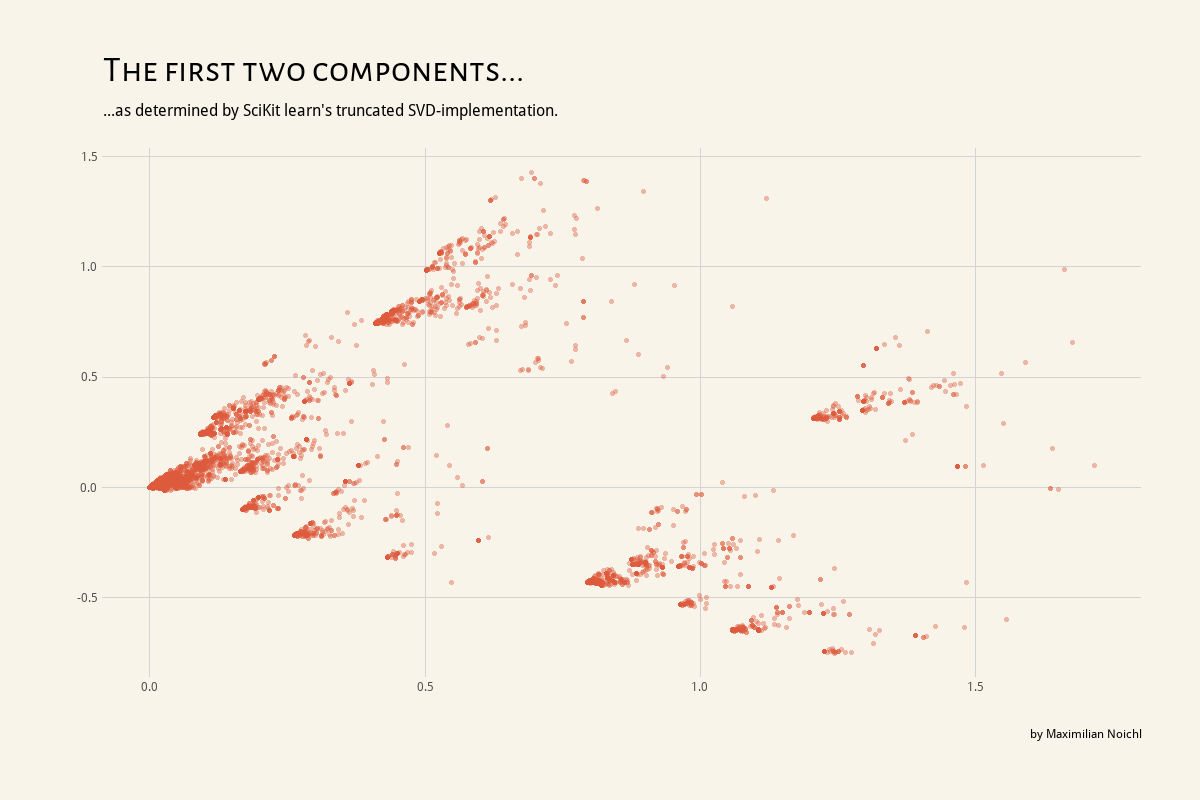

In [8]:
%%R -i sSVD --width 1200 --height 800 -r 140 --bg #F8F4E9
library(hrbrthemes)
library(ggplot2)

library(showtext)
font.add.google(name = "Alegreya Sans SC", family = "SC")
showtext.auto()


p <- ggplot(sSVD, aes(x=sSVD$x, y=sSVD$y)) + geom_point(color="#dd593c", alpha=0.4,pch=16,cex=0.9)+
labs(x="", y="",
       title="The first two components...",
       subtitle="...as determined by SciKit learn's truncated SVD-implementation.",
       caption="by Maximilian Noichl")+
theme_ipsum()+
theme(panel.grid.major = element_line(colour = "lightgrey"),panel.grid.minor = element_blank()) +

theme(plot.title = element_text(size=27, family="SC", face="plain"))



p


#### Now embedding with UMAP: 

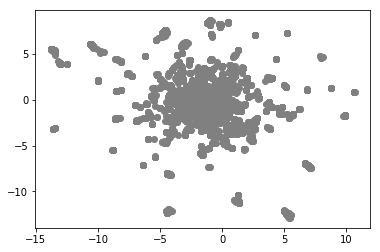

In [9]:
import umap
embedding = umap.UMAP(n_neighbors=15,#small => local, large => global: 5-50
                      min_dist=0.001, #small => local, large => global: 0.001-0.5
                      metric='cosine').fit_transform(XSVD)
embedding = pd.DataFrame(embedding)
embedding.columns = ['x','y']
plt.scatter(embedding['x'], embedding['y'], color='grey')



C:\Users\user\Anaconda3\lib\site-packages\rpy2\robjects\pandas2ri.py:190: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


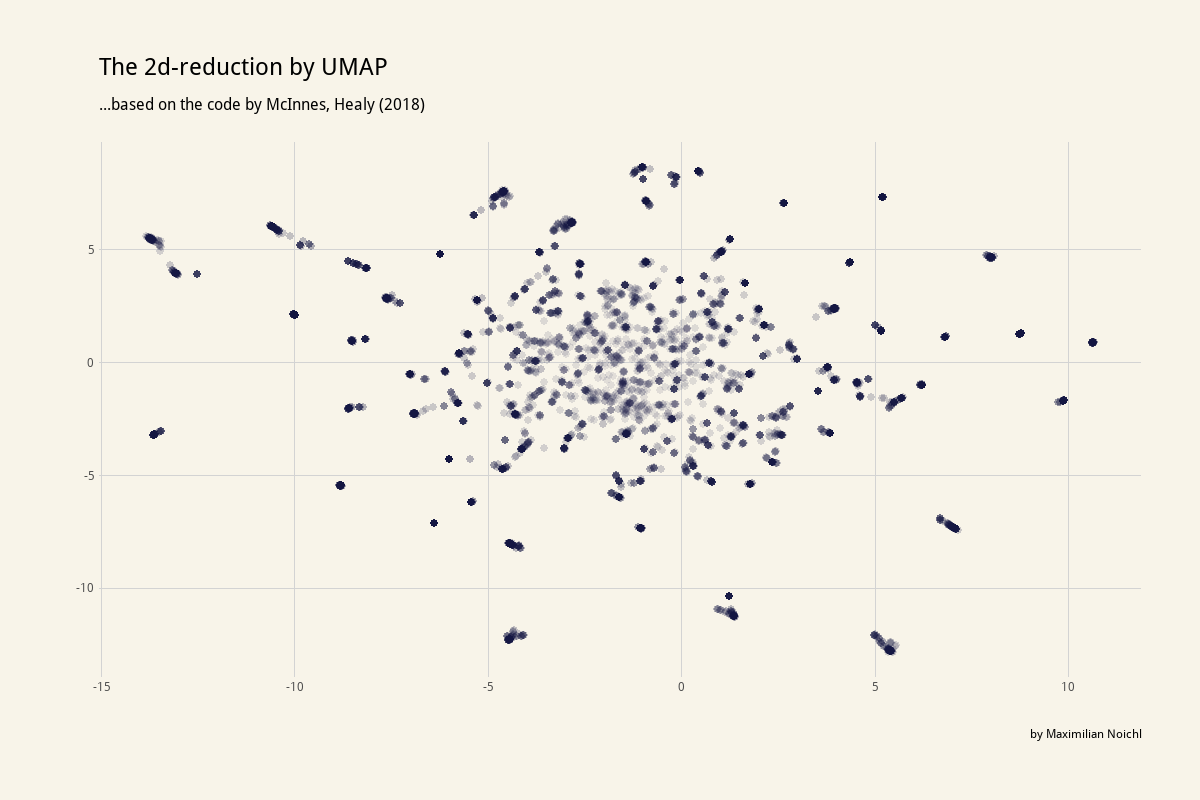

In [10]:
%%R -i embedding --width 1200 --height 800 -r 140 --bg #F8F4E9
library(hrbrthemes)
library(ggplot2)
library(fields)
embedding$density <- fields::interp.surface(
  MASS::kde2d(embedding$x, embedding$y), embedding[,c("x","y")])

p <- ggplot(embedding, aes(x=embedding$x, y=embedding$y,alpha = 1/(density/20)))+

guides(alpha=FALSE, color=FALSE)+


geom_point(color="#131541", pch=16,cex=1.7)+ theme_ipsum_rc()+
labs(x="", y="",
       title="The 2d-reduction by UMAP",
       subtitle="...based on the code by McInnes, Healy (2018)",
       caption="by Maximilian Noichl")+
theme(panel.grid.major = element_line(colour = "lightgrey"),panel.grid.minor = element_blank()
)
p


#### Now for the clustering. 
I didn't really care to find the same clustering-solution, a is  on reddit, so everything might look a bit different:

In [15]:


import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=40, min_samples=50, gen_min_span_tree=True)
clusterer.fit(embedding)
XCLUST = clusterer.labels_
clusternum = len(set( clusterer.labels_))-1

dfclust = pd.DataFrame(XCLUST)
dfclust.columns = ['cluster']

print(clusternum)


18


#### Now lets inspect the clusters and build a vector for the labels. 
We will copypaste this vector into the next R-magic, in order to correct some labels if need be. 


In [16]:
df = pd.read_csv('nodes2.csv', delimiter=';')
df.columns = ['name','ingredients','id']
df = pd.concat([df, dfclust],axis=1)

fullstrsl = []
#display(df)
for x in range(0,clusternum):
    abstracts = list(df.loc[df['cluster'] == x]['ingredients'])
    abstracts = ";".join(str(x) for x in abstracts).replace(',',';')
    #print(abstracts)
    fullstrsl.append(abstracts)
#print(fullstrsl)
vec = CountVectorizer(token_pattern=r'(?<=[^|;])[\s\w]+(?=[$|;])')

X = vec.fit_transform(fullstrsl)

#display(pd.DataFrame(X.toarray(), columns=vec.get_feature_names()).transpose()) #To look into the vectors. Beware, can take a bit of RAM


clusterfeatures = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
fullscore = []
for x in range(0,clusternum):
    scores = zip(vec.get_feature_names(), np.asarray(X[x,:].sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    myscores = sorted_scores[0:20]
    
    scorelist = []
    for s in myscores:
        scorelist.append(s[0])
    fullscore.append(scorelist)
display(pd.DataFrame(fullscore))

head = []
for l in fullscore:
    head.append(str(l[:6]).replace("'","").replace("[","").replace("]","").replace(",","\n"))


print(head)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,gin,lemon juice,sugar,grenadine,flavored brandy liqueur,orange juice,apricot flavored brandy,brandy,egg yolk,grand marnier,angostura bitters,cointreau,crème de cassis,crème yvette,curaçao,maple syrup,orange bitters,amer picon,applejack,aromatic bitters
1,gin,dry vermouth,sweet vermouth,curaçao,orange bitters,pastis,aromatic bitters,angostura bitters,cocktail sherry,lemon juice,crème de menthe,orange juice,benedictine,grand marnier,orgeat,anisette,brandy,cointreau,grapefruit juice,grenadine
2,dry vermouth,gin,orange bitters,sweet vermouth,cointreau,pastis,pineapple juice,benedictine,angostura bitters,cherry flavored brandy,curaçao,dubonnet,kirsch,lemon juice,lime juice,campari,grand marnier,grenadine,kummel,apricot flavored brandy
3,gin,sweet vermouth,orange bitters,dry vermouth,curaçao,crème de cacao,pastis,angostura bitters,blended scotch,green chartreuse,aromatic bitters,brandy,campari,cream,lemon juice,maraschino liqueur,sloe gin,sprig of mint,benedictine,grenadine
4,gin,orange juice,lemon juice,dry vermouth,dubonnet,cointreau,sugar,angostura bitters,apricot flavored brandy,cherry flavored brandy,grenadine,lime juice,calvados,cocktail sherry,lillet blanc,pineapple slice,white rum,james rum,apry,aromatic bitters
5,gin,dry vermouth,sweet vermouth,crème de menthe,lime juice,orange juice,orgeat,sugar,grand marnier,s lime juice,cocktail sherry,lemon juice,vanilla ice cream,angostura bitters,aromatic bitters,blended scotch,cointreau,crème de cacao,dry vermouth or noilly prat,dubonnet
6,gin,dry vermouth,lemon juice,crème yvette,sweet vermouth,orange bitters,cointreau,apple cider,aromatic bitters,bacardi white rum,brandy,cherry liqueur,cider,cola,dubonnet,fernet branca,grenadine,passion fruit nectar,sirop de citron,sugar
7,cream,crème de cacao,vodka,apricot flavored brandy,lemon juice,galliano,sugar,gin,grenadine,crème de menthe,dry vermouth,pineapple juice,bourbon,white rum,brandy,cocktail sherry,cointreau,crème de noyeau,lillet blanc,lime juice
8,sweet vermouth,angostura bitters,orange bitters,gin,rum,sugar,fernet branca,applejack,campari,curaçao,dry vermouth,kummel,old tom gin,pastis,white rum,absinthe,apple brandy,dark rum,dubonnet,kirsch
9,brandy,sugar,lemon juice,angostura bitters,kummel,port,benedictine,ice,water or sugar,aromatic bitters,coffee,crème de cacao,crème de menthe,curaçao,bourbon,cherry flavored brandy,cointreau,fernet branca,grand marnier,green chartreuse


['gin\n lemon juice\n sugar\n grenadine\n flavored brandy liqueur\n orange juice', 'gin\n dry vermouth\n sweet vermouth\n curaçao\n orange bitters\n pastis', 'dry vermouth\n gin\n orange bitters\n sweet vermouth\n cointreau\n pastis', 'gin\n sweet vermouth\n orange bitters\n dry vermouth\n curaçao\n crème de cacao', 'gin\n orange juice\n lemon juice\n dry vermouth\n dubonnet\n cointreau', 'gin\n dry vermouth\n sweet vermouth\n crème de menthe\n lime juice\n orange juice', 'gin\n dry vermouth\n lemon juice\n crème yvette\n sweet vermouth\n orange bitters', 'cream\n crème de cacao\n vodka\n apricot flavored brandy\n lemon juice\n galliano', 'sweet vermouth\n angostura bitters\n orange bitters\n gin\n rum\n sugar', 'brandy\n sugar\n lemon juice\n angostura bitters\n kummel\n port', 'dry vermouth\n curaçao\n grenadine\n angostura bitters\n crème de cassis\n lemon wheel', 'white rum\n lime juice\n lemon juice\n cocktail sherry\n sugar\n angostura bitters', 'gin\n curaçao\n dubonnet\n orange

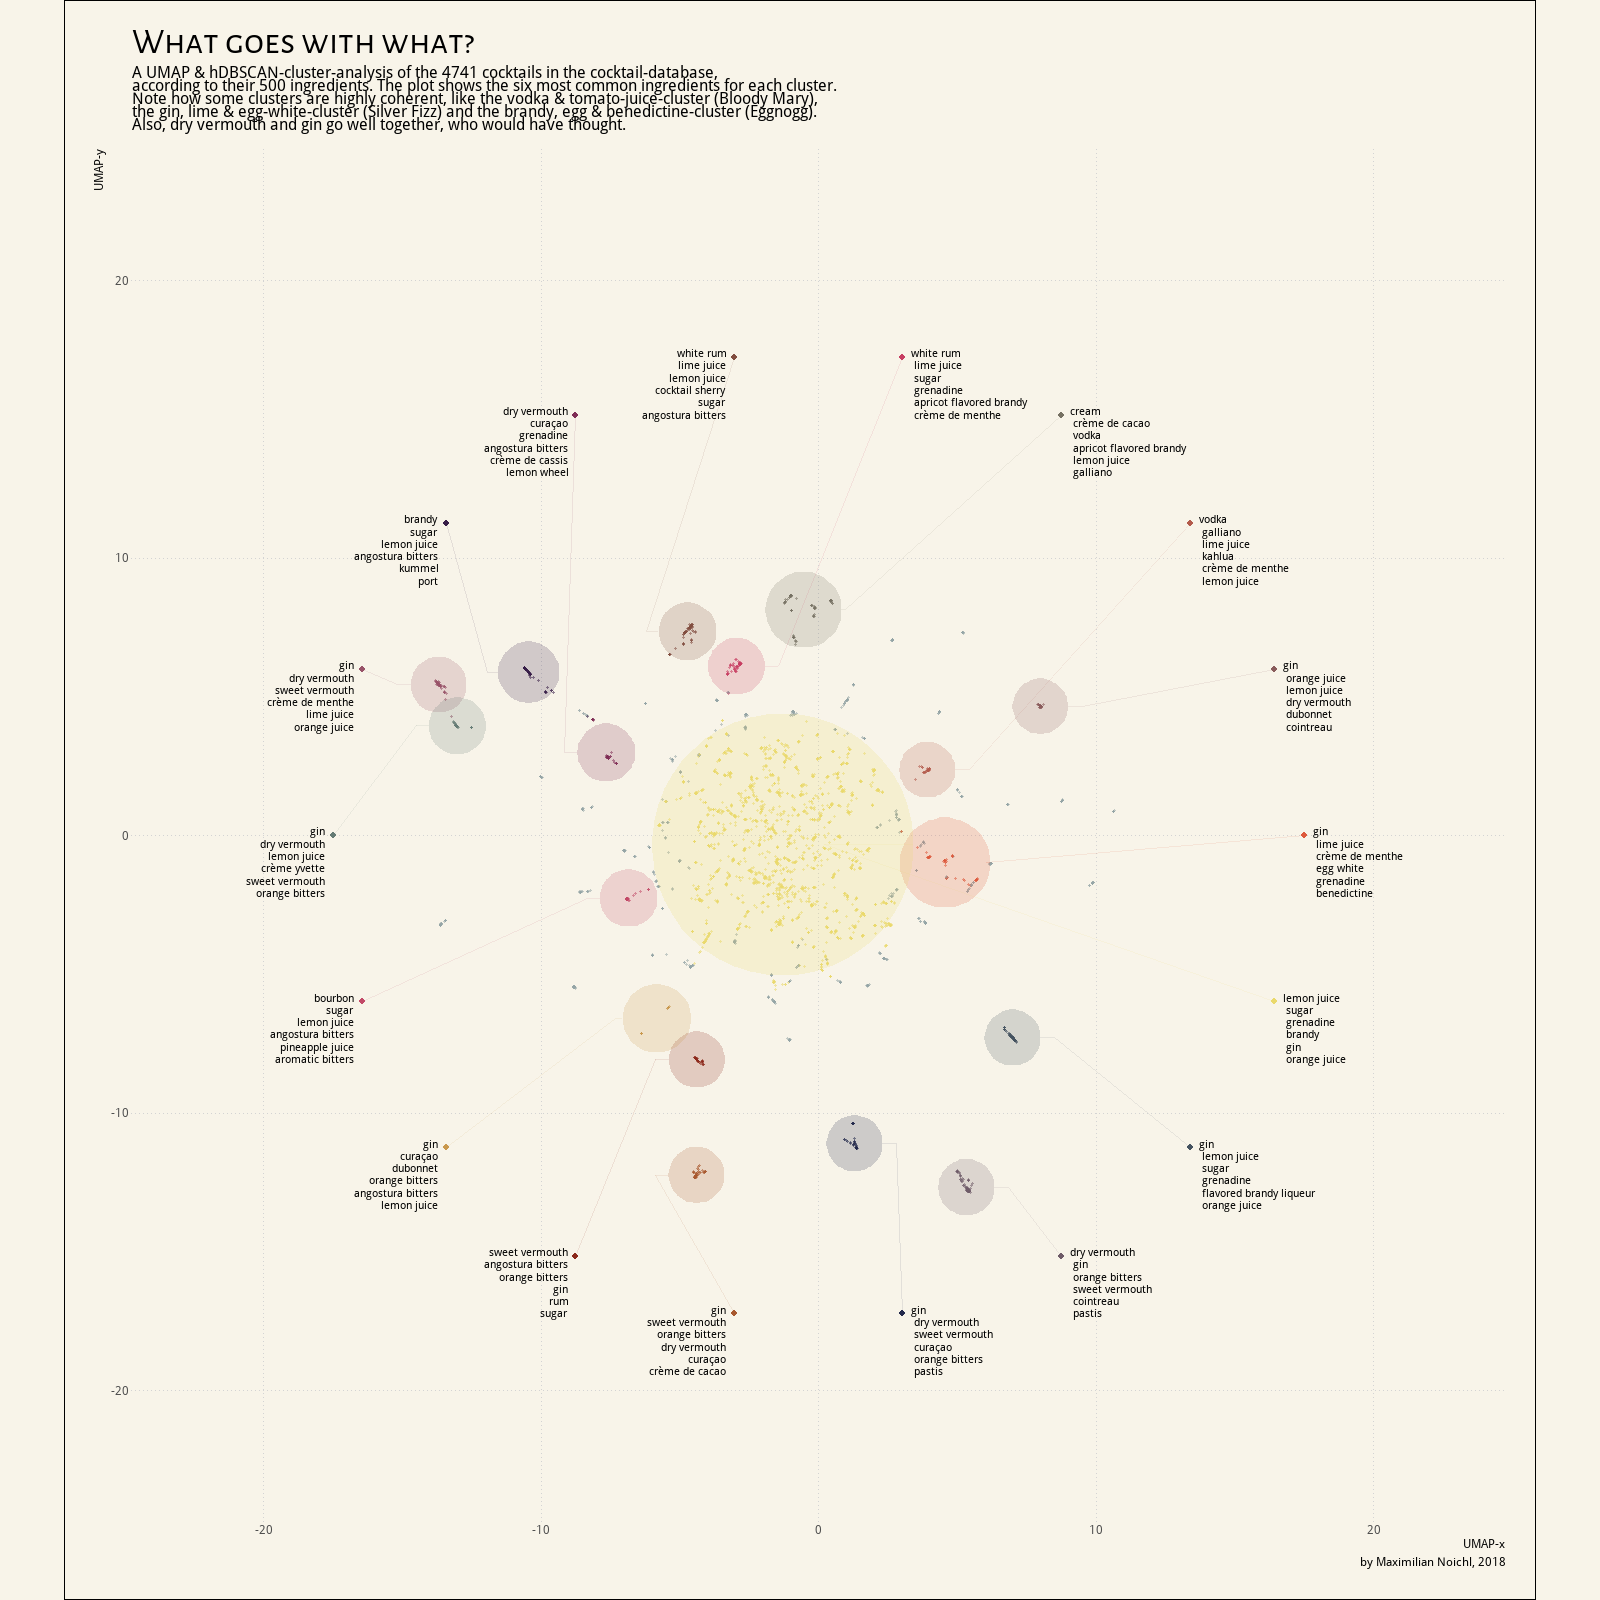

In [29]:
%%R -i embedding,dfclust -o myNewColors -h 1600 -w 1600 --bg #F8F4E9

# Some imports:
library(hrbrthemes)
library(ggplot2)
library(fields)
library(ggrepel)
library(ggforce)

options(warn=0)# 0 zum anschalten

#Get the cluster means:
means <- aggregate(embedding[,c("x","y")], list(dfclust$cluster), mean)
means <- data.frame(means)
#And Variance, for the labels:
test <- aggregate(embedding[,c("x")], list(dfclust$cluster), var)
test <- test[-1,]

n=nrow(means)
means <- means[-1,]
#Make the colors: 
mycolors <- c("#dd593c",
"#ead96c",
"#df4467",
"#8d2315",
"#675d69",
"#70897b",
"#131541") 

pal <- colorRampPalette(sample(mycolors))
s <- n-1
myGray <- c('#95a5a6')
myNewColors <- sample(pal(s))
myPal <- append(myGray,myNewColors)

#fonts:
library(showtext)
font.add.google(name = "Alegreya Sans SC", family = "SC")
showtext.auto()


#labels, copied from above:
labels <- c('gin\n lemon juice\n sugar\n grenadine\n flavored brandy liqueur\n orange juice', 'gin\n dry vermouth\n sweet vermouth\n curaçao\n orange bitters\n pastis', 'dry vermouth\n gin\n orange bitters\n sweet vermouth\n cointreau\n pastis', 'gin\n sweet vermouth\n orange bitters\n dry vermouth\n curaçao\n crème de cacao', 'gin\n orange juice\n lemon juice\n dry vermouth\n dubonnet\n cointreau', 'gin\n dry vermouth\n sweet vermouth\n crème de menthe\n lime juice\n orange juice', 'gin\n dry vermouth\n lemon juice\n crème yvette\n sweet vermouth\n orange bitters', 'cream\n crème de cacao\n vodka\n apricot flavored brandy\n lemon juice\n galliano', 'sweet vermouth\n angostura bitters\n orange bitters\n gin\n rum\n sugar', 'brandy\n sugar\n lemon juice\n angostura bitters\n kummel\n port', 'dry vermouth\n curaçao\n grenadine\n angostura bitters\n crème de cassis\n lemon wheel', 'white rum\n lime juice\n lemon juice\n cocktail sherry\n sugar\n angostura bitters', 'gin\n curaçao\n dubonnet\n orange bitters\n angostura bitters\n lemon juice', 'vodka\n galliano\n lime juice\n kahlua\n crème de menthe\n lemon juice', 'white rum\n lime juice\n sugar\n grenadine\n apricot flavored brandy\n crème de menthe', 'bourbon\n sugar\n lemon juice\n angostura bitters\n pineapple juice\n aromatic bitters', 'gin\n lime juice\n crème de menthe\n egg white\n grenadine\n benedictine', 'lemon juice\n sugar\n grenadine\n brandy\n gin\n orange juice')

#circular markers:  
library(gridExtra)

circle <- polygon_regular(50)
pointy_points <- function(x, y, size){
  do.call(rbind, mapply(function(x,y,size,id) 
    data.frame(x=size*circle[,1]+x, y=size*circle[,2]+y, id=id),
         x=x,y=y, size=size, id=seq_along(x), SIMPLIFY=FALSE))
}


#get density, to avoid overplotting
embedding$density <- fields::interp.surface(
  MASS::kde2d(embedding$x, embedding$y), embedding[,c("x","y")])

# get for every label, wether it is in the + or - part of the x-axis:                        
xpol <-abs(means[,c("x")])/means[,c("x")]
ypol <-abs(means[,c("y")])/means[,c("y")]


polfact <- 1.5
 
# build a circle for the labels:
r <- 17.5
sequence <- seq(from = 1, to = s, by = 1)
angles <- 360/s*sequence
angle <-(angles*(pi/180))
         
xlabl <- cos(angle)*r
ylabl <- sin(angle)*r
circlecord <- cbind(xlabl,ylabl)
meanscord <-  data.frame(means$x,means$y)


#Append every label to its best fit on that circle, using the hungarian algorithm:
require(clue)

distances <- rdist(circlecord,meanscord)
sol <- solve_LSAP(t(distances))
solo <- data.frame(cbind(mx=(meanscord[,1]), my=(meanscord[,2]), cx=(circlecord[sol, 1]), cy=(circlecord[sol, 2])))
                        
xcpol <-abs(solo$cx)/solo$cx

# install.packages("stringr")
# library(stringr)



coord_x=5
coord_y=5

                        
# define circular markers:
circular_annotations <- pointy_points(means$x, means$y, size=test$x+1)


#Let's plot!
p <- ggplot()+
geom_point(data=embedding, aes(x=embedding$x, y=embedding$y, color= as.factor(dfclust$cluster), alpha = 0/density), pch=16,cex=0.9)+ 
theme_ipsum_rc()+
scale_color_manual(values = myPal) +
geom_polygon(data=circular_annotations, aes(x,y,group=factor(id), fill = factor(id)),alpha=0.2)+
scale_fill_manual(values = myNewColors) +     
                       
geom_point(data=solo, aes(x=cx, y=cy), color= myNewColors, alpha = 1,pch=16,size=2, stroke = 1)+
annotate("segment", x = solo$mx+(test$x+1)*xcpol, y = solo$my, xend = solo$mx+xcpol*polfact, yend = solo$my, color= myNewColors, alpha = 0.1)+
annotate("segment", x = solo$mx+xcpol*polfact, y = solo$my, xend = solo$cx, yend = solo$cy, color= myNewColors, alpha = 0.1)+
annotate("text", x = solo$cx+xcpol*0.3, y = solo$cy+0.3, label = labels, color="black", fontface="italic",  size=3, parse = FALSE, hjust=abs((xcpol+1)/2-1),vjust=1)+
guides(alpha=FALSE, color=FALSE, fill=FALSE)+

labs(x="UMAP-x", y="UMAP-y",
       title="What goes with what?",
       subtitle="A UMAP & hDBSCAN-cluster-analysis of the 4741 cocktails in the cocktail-database,
according to their 500 ingredients. The plot shows the six most common ingredients for each cluster.
Note how some clusters are highly coherent, like the vodka & tomato-juice-cluster (Bloody Mary),
the gin, lime & egg-white-cluster (Silver Fizz) and the brandy, egg & benedictine-cluster (Eggnogg). 
Also, dry vermouth and gin go well together, who would have thought.",
    caption="by Maximilian Noichl, 2018")+
                        
theme(panel.grid.major = element_line(colour = "lightgrey", linetype=3),panel.grid.minor = element_blank())+
theme(plot.background = element_rect(fill = "#F8F4E9"))+
expand_limits(x = c(r+5,0-r-5),y = c(r+5,0-r-5))+
theme(plot.title = element_text(size=27, family="SC", face="plain"))+
coord_fixed()


p
# pdf("CocktailClusteringUMapSVD.pdf",width=15,height=15) # Open a new pdf file
# grid.arrange(p) # Write the grid.arrange in the file\n",
# dev.off()



#### And we can inspect the clustering tree:

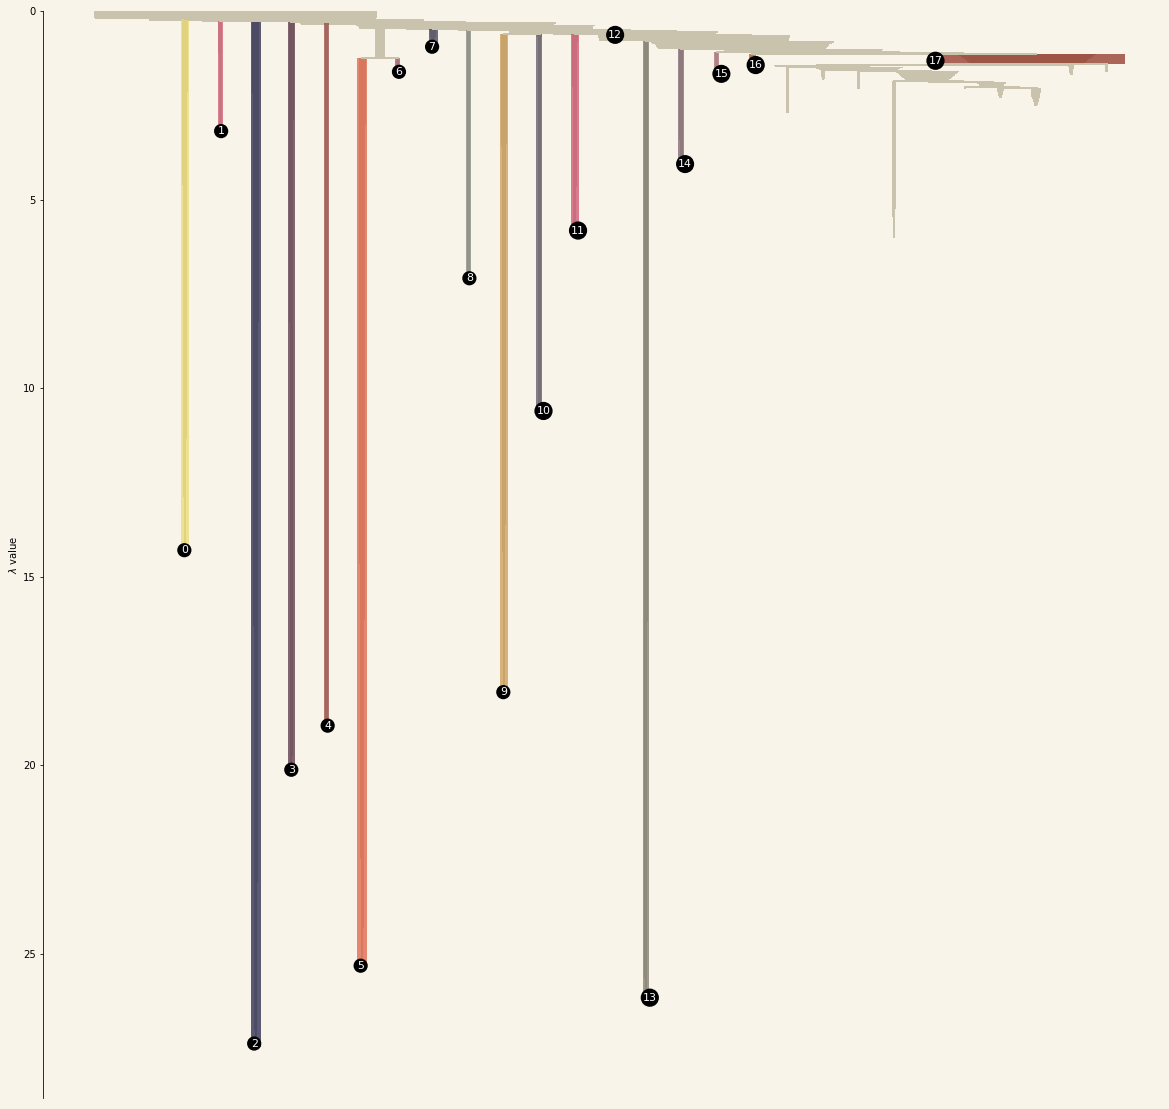

In [13]:
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams['figure.facecolor'] = '#F8F4E9'
plt.rcParams['axes.facecolor'] = '#F8F4E9'

import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#C9C3AE","#C9C3AE","#C9C3AE"])

clusterer.condensed_tree_.plot(cmap = cmap,select_clusters=True,label_clusters = True, selection_palette=myNewColors, 
                               colorbar = False,max_rectangles_per_icicle=80, alpha=0.7,barwidthfactor=8,linecolor='#C9C3AE',linewidth=2)

plt.savefig('clustertree.pdf')
